In [29]:
import numpy as np
import pyrealsense2 as rs
import matplotlib.pyplot as plt
import cv2

In [20]:
color_frames = np.load("../data/scanner/color_frames.npy")
depth_frames = np.load("../data/scanner/depth_frames.npy")

In [21]:
depth_frames.shape

(58, 480, 640)

In [22]:
depth_frames[0]

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ..., 1540,    0,    0],
       ...,
       [   0,    0,    0, ...,  786,  786,    0],
       [   0,    0,    0, ...,  785,  786,    0],
       [   0,    0,    0, ...,    0,    0,    0]], dtype=uint16)

In [32]:
depth_frame = depth_frames[20] / 1000
depth_frame[depth_frame > 0.5] = 0

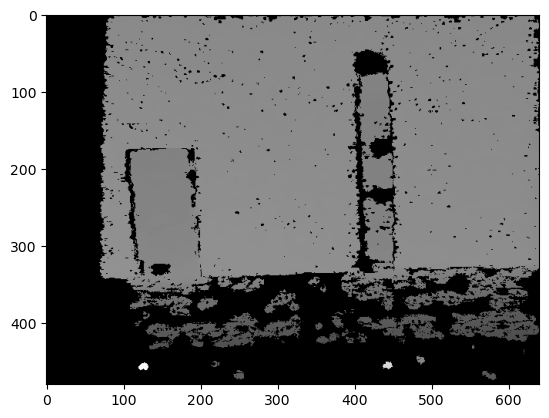

In [33]:
plt.imshow(depth_frame, cmap='gray')

In [34]:
for depth_frame in depth_frames:
    depth_frame = depth_frame / 1000
    depth_frame[depth_frame > 0.5] = 0
    cv2.imshow("frame", depth_frame)
    cv2.waitKey(0)

cv2.destroyAllWindows()